In [151]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import iqr
import matplotlib.patches as mpatches
import scipy.stats as st


In [152]:
# Load heart data set into pandas
heart_df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [153]:
#Check for empty spots
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


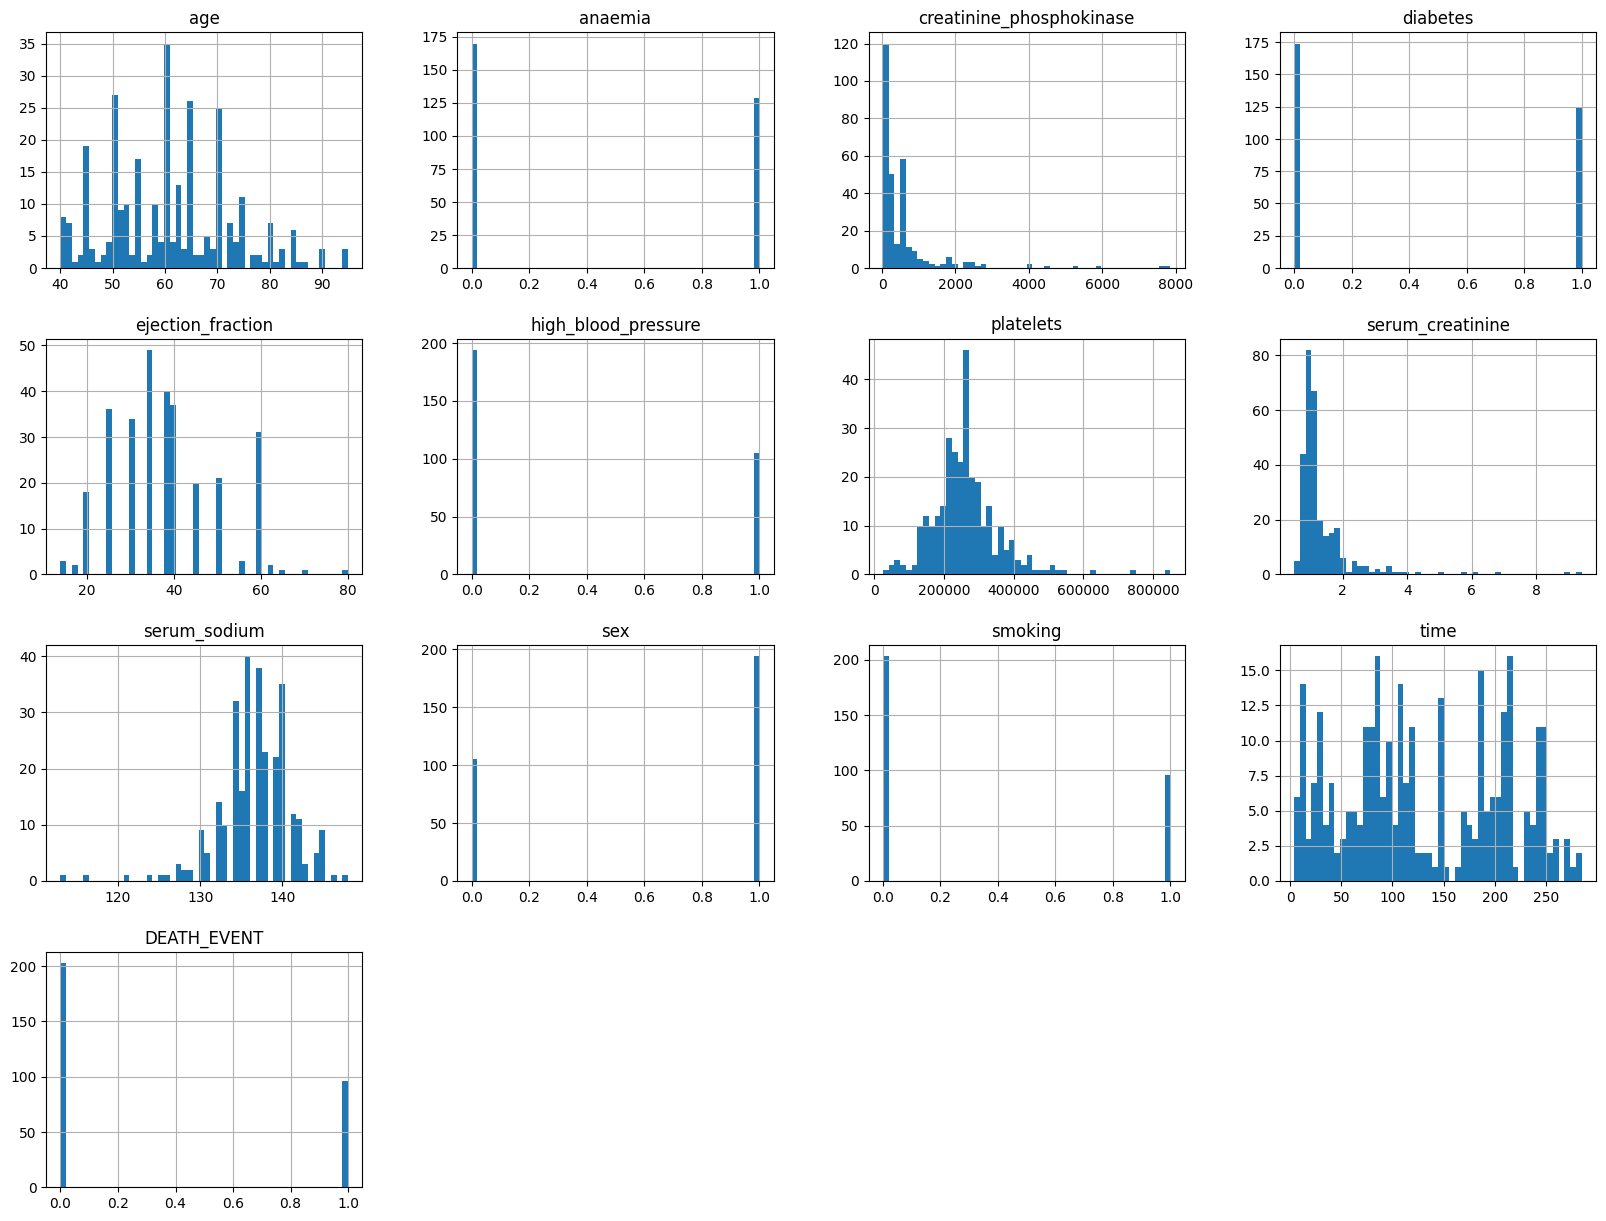

In [154]:
heart_df.hist(bins=50, figsize=(20,15))
plt.show()

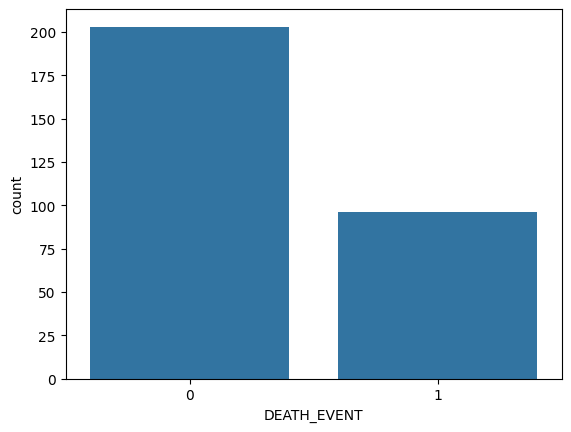

In [155]:
#"Death_Event" represents if the patient died during the follow up period.
#0 = living | 1 = deceased

death = heart_df['DEATH_EVENT']
sns.countplot(x=death)
plt.show()

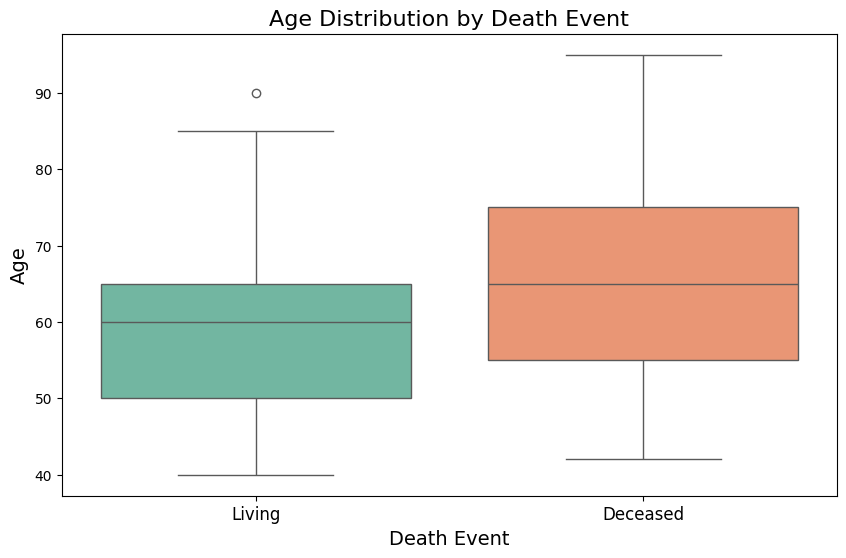

In [156]:
# Create the boxplot
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=heart_df, x='DEATH_EVENT', y='age', hue='DEATH_EVENT', palette='Set2', dodge=False)

# Customize the plot
boxplot.set_title('Age Distribution by Death Event', fontsize=16)
boxplot.set_xlabel('Death Event', fontsize=14)
boxplot.set_ylabel('Age', fontsize=14)

# Set custom x-axis labels
boxplot.set_xticks([0, 1])
boxplot.set_xticklabels(['Living', 'Deceased'], fontsize=12)

# Remove the legend
boxplot.legend_.remove()

# Show the plot
plt.show()

### Laura Sunley
#### Variables: Biological Sex and Death Rate
#### Question: Does biological sex play a factor in heart failure?
##### The percentage of female patients is 35.12%, the percentage of deaths that were female is 35.42%
##### The percentage of male patients is 64.88%, the percentage of deaths that were male is 64.58%
##### Males had a significantly higher death rate than females.

/var/folders/hd/p5_45krj19z5mg2jsb55zjcr0000gn/T/ipykernel_6494/912645397.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


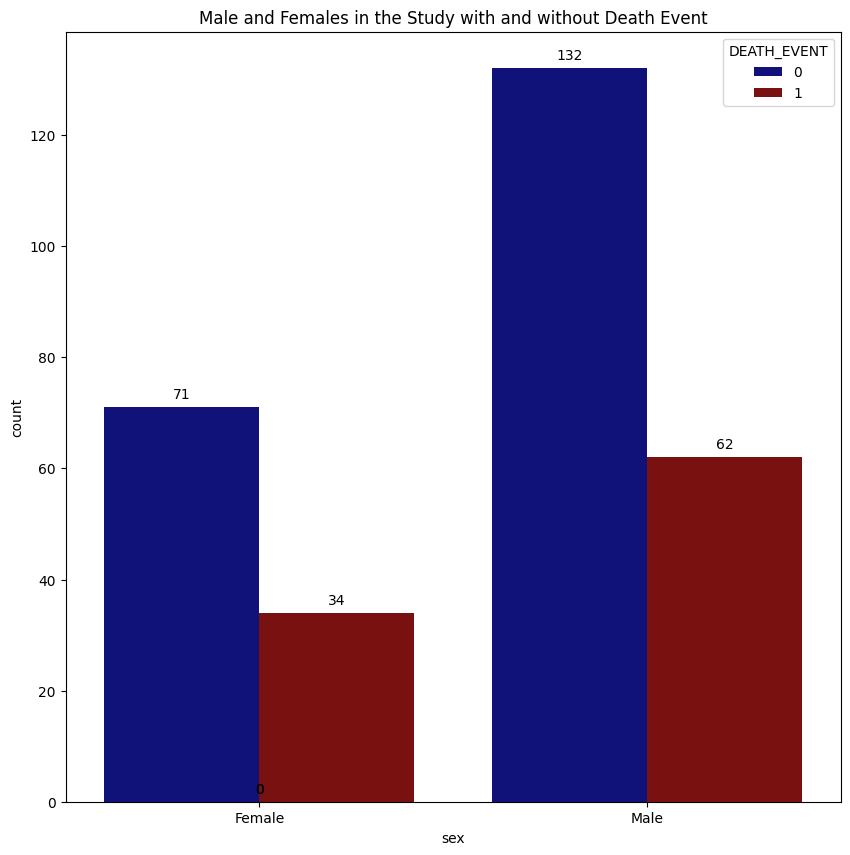

The percentage of female patients is 35.12%
The percentage of deaths that were female is 35.42%
The percentage of male patients is 64.88%
The percentage of deaths that were male is 64.58%


In [157]:
# Male patients that encountered a death event
male_death = heart_df[(heart_df['sex'] == 1) & (heart_df['DEATH_EVENT'] == 1)]
num_male_deaths = len(male_death)

# Female patients that encountered a death event
female_death = heart_df[(heart_df['sex'] == 0) & (heart_df['DEATH_EVENT'] == 1)]
num_female_deaths = len(female_death)

# Count total patients and deaths by sex
total_by_sex = heart_df['sex'].value_counts()
deaths_by_sex = heart_df[heart_df['DEATH_EVENT'] == 1]['sex'].value_counts()

# Calculate percentages
result_df = pd.DataFrame({
    'sex': ['Female', 'Male'],
    'total_count': [total_by_sex[0], total_by_sex[1]],
    'death_count': [deaths_by_sex.get(0, 0), deaths_by_sex.get(1, 0)]
})
result_df['total_percentage'] = (result_df['total_count'] / result_df['total_count'].sum()) * 100
result_df['death_total_percentage'] = (result_df['death_count'] / result_df['death_count'].sum()) * 100

# Step 2: Create the count plot
plt.figure(figsize=(10,10))
cols= ["darkblue","darkred"]

# Creating the countplot
ax = sns.countplot(x=heart_df['sex'], data=heart_df, hue="DEATH_EVENT", palette=cols)

# Changing the x-axis labels from 0,1 to Female, Male
ax.set_xticklabels(['Female', 'Male'])

# Adding text labels to the top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

# Set the title of the plot
ax.set_title("Male and Females in the Study with and without Death Event")

# Display the plot
plt.show()

# Step 3: Display calculated percentages
for index, row in result_df.iterrows():
    if row['sex'] == 'Male':
        print(f"The percentage of male patients is {row['total_percentage']:.2f}%")
        print(f"The percentage of deaths that were male is {row['death_total_percentage']:.2f}%")
    else:
        print(f"The percentage of female patients is {row['total_percentage']:.2f}%")
        print(f"The percentage of deaths that were female is {row['death_total_percentage']:.2f}%")



### Yiling - Highblood pressure, sex, age related to death event


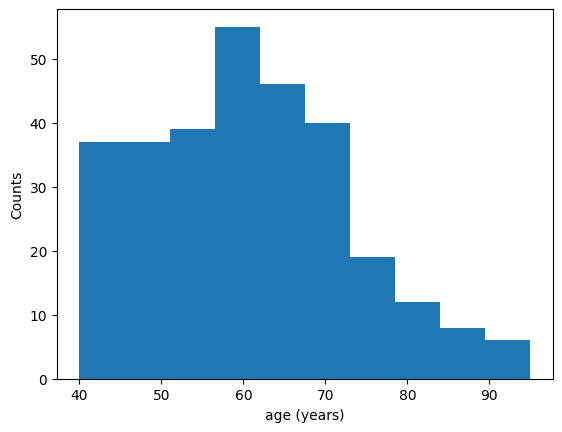

NormaltestResult(statistic=0.5869831057644854, pvalue=0.745655521477494)
NormaltestResult(statistic=8.951476705758214, pvalue=0.011381815225225142)


In [158]:
# age group vs death count
plt.hist(heart_df['age'])
plt.xlabel('age (years)')
plt.ylabel('Counts')
plt.show()


# Determine the total number of rows in heart_df
total_rows = len(heart_df)

# Ensure sample sizes are within the range of the data size
sample_size_1 = min(50, total_rows)
sample_size_2 = min(300, total_rows)

# Perform the normality test on samples of the 'age' column from heart_df
print(st.normaltest(heart_df["age"].sample(sample_size_1)))
print(st.normaltest(heart_df["age"].sample(sample_size_2)))

#### Question: How does the age related to Heart Disease?
##### Age is one of the major risk factors for heart disease, and as we age, the likelihood of hardening of the blood vessels and atherosclerosis increases, leading to a higher risk of heart disease. This data shows that the age average is in the 60's. We found that the old group had the highest prevalence rate, followed by the young and middle-aged groups.

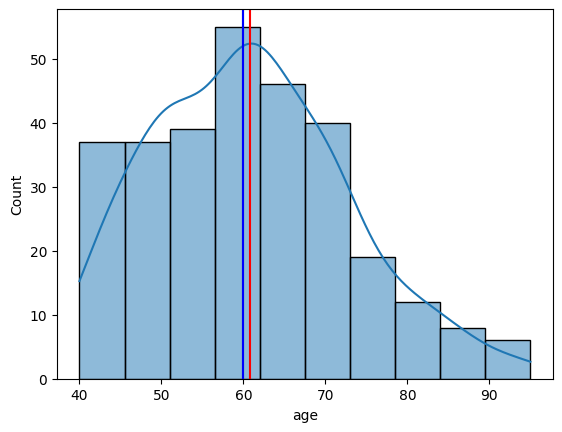

In [159]:
sns.histplot(heart_df['age'],kde=True)
plt.axvline(heart_df['age'].mean(), color='red')
plt.axvline(heart_df['age'].median(), color='green')
plt.axvline(heart_df['age'].mode()[0], color='blue')
plt.show()

# print('mean',heart_df['age'].mean())
# print('median',heart_df['age'].median())
# print('mode',heart_df['age'].mode())


In [160]:
# heart disease of age range
age_df = pd.DataFrame()

age_df["age_range"] = pd.cut(x=heart_df["age"],
                             bins=[0, 30, 40, 50 , 60, 70, 80, 90, 100],
                             include_lowest=True,
                             right=False,
                             labels=['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+'])

age_df = pd.concat([age_df["age_range"], heart_df["DEATH_EVENT"]], axis=1)
age_df.head()

at = age_df.groupby(["age_range", "DEATH_EVENT"], observed=False).agg({"DEATH_EVENT": "count"})
at.rename(columns={"DEATH_EVENT": "Amount"}, inplace=True)
at = at.reset_index()

In [161]:
# Age group
age_bins = [0, 30, 40, 50 , 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70-79
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50-59
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,60-69
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,50-59
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,60-69


In [162]:
# high blood pressure patients that encountered a death event
high_blood_pressure = heart_df[(heart_df["high_blood_pressure"]==1) & (heart_df["DEATH_EVENT"]==1)]
num_blood_pressure = len(high_blood_pressure)
print(f"The number of high blood Pressure that had a death event: {num_blood_pressure}")
# normal blood pressure that encountered a death event

nor_blood_pressure = heart_df[(heart_df["high_blood_pressure"]== 0) & (heart_df["DEATH_EVENT"]==1)]
num_nor_blood_pressure = len(nor_blood_pressure)
print(f"The number of normal blood Pressure that had a death event: {num_nor_blood_pressure}")
#merge high blood pressure and age group
# high blood pressure patients that encountered a death event by age group
hypertension_death_age_group = heart_df[(heart_df["high_blood_pressure"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='hypertension_death_count')
hypertension_death_age_group

# normal blood pressure patients that encountered a death event by age group
nor_bloodPerssure_death_age_group = heart_df[(heart_df["high_blood_pressure"] == 1) & (heart_df["DEATH_EVENT"] == 0)].groupby('age_group', observed=False).size().reset_index(name='normal_blood_pressure_count')
nor_bloodPerssure_death_age_group

#merge high blood pressure and age group
death_age_group = hypertension_death_age_group.merge(nor_bloodPerssure_death_age_group, on="age_group", how='outer')
death_age_group


The number of high blood Pressure that had a death event: 39
The number of normal blood Pressure that had a death event: 57


,age_group,hypertension_death_count,normal_blood_pressure_count
0,0-29,0,0
1,30-39,0,0
2,40-49,5,9
3,50-59,8,18
4,60-69,6,23
5,70-79,13,16
6,80-89,4,0
7,90+,3,0


#### Question: Is the relationship between high blood pressure and age? Does outcome affect cardiac recurrence?
##### High blood pressure (BP), is major modifiable risk factors for heart disease. Persistent high blood pressure can damage blood vessels and increase the likelihood of a heart attack. High blood pressure increases with age (high rate in 60 to 70). The age around 40 to 49, death eveth in 36%, 50 to 59, death event in 31%, 60 to 69 in death event is 21%, 70-79 in death event is 45%, 80 and above is 100%. So, age is the major factor to affect high blood pressure

In [163]:
# Step 1: Calculate the total number of patients with high blood pressure in each age group
death_age_group['total_patients'] = death_age_group['hypertension_death_count'] + death_age_group['normal_blood_pressure_count']
# Step 2: Calculate the percentage of patients who encountered a death event
death_age_group['death_event_percentage'] = (death_age_group['hypertension_death_count'] / death_age_group['total_patients']) * 100
# Step 3: Display the updated DataFrame
death_age_group

,age_group,hypertension_death_count,normal_blood_pressure_count,total_patients,death_event_percentage
0,0-29,0,0,0,NaN
1,30-39,0,0,0,NaN
2,40-49,5,9,14,35.714286
3,50-59,8,18,26,30.769231
4,60-69,6,23,29,20.689655
5,70-79,13,16,29,44.827586
6,80-89,4,0,4,100.000000
7,90+,3,0,3,100.000000


In [164]:
# Step 1: Prepare data for the summary
# Grouping and counting for females and males separately based on high blood pressure and age
female_counts = heart_df[(heart_df['sex'] == 0) & (heart_df['high_blood_pressure'] == 1)].groupby('age_group',observed=False).size()
male_counts = heart_df[(heart_df['sex'] == 1) & (heart_df['high_blood_pressure'] == 1)].groupby('age_group',observed=False).size()

# Step 2: Combine data into a DataFrame

data_summary = pd.DataFrame({
    "age_group": death_age_group['age_group'],
    "Female": female_counts.values,
    "Male": male_counts.values
})

# Display the summary DataFrame
data_summary

,age_group,Female,Male
0,0-29,0,0
1,30-39,0,0
2,40-49,8,6
3,50-59,11,15
4,60-69,11,18
5,70-79,11,18
6,80-89,2,2
7,90+,1,2


In [165]:
# Step 1: Calculate the total number of patients with high blood pressure in each age group
death_age_group['total_patients'] = death_age_group['hypertension_death_count'] + death_age_group['normal_blood_pressure_count']
# Step 2: Calculate the percentage of patients who encountered a death event
death_age_group['death_event_percentage'] = (death_age_group['hypertension_death_count'] / death_age_group['total_patients']) * 100
# Step 3: Display the updated DataFrame
death_age_group

,age_group,hypertension_death_count,normal_blood_pressure_count,total_patients,death_event_percentage
0,0-29,0,0,0,NaN
1,30-39,0,0,0,NaN
2,40-49,5,9,14,35.714286
3,50-59,8,18,26,30.769231
4,60-69,6,23,29,20.689655
5,70-79,13,16,29,44.827586
6,80-89,4,0,4,100.000000
7,90+,3,0,3,100.000000


#### What is ratio in sex in high blood pressure with age group?
##### High blood pressure can occur at any age, but in heart disease, the high blood pressure start to happen in early 30, the high rate overall age beweet 60-79; In data have show that male with high blood pressure affect in heart disease more than female in high blood pressure.

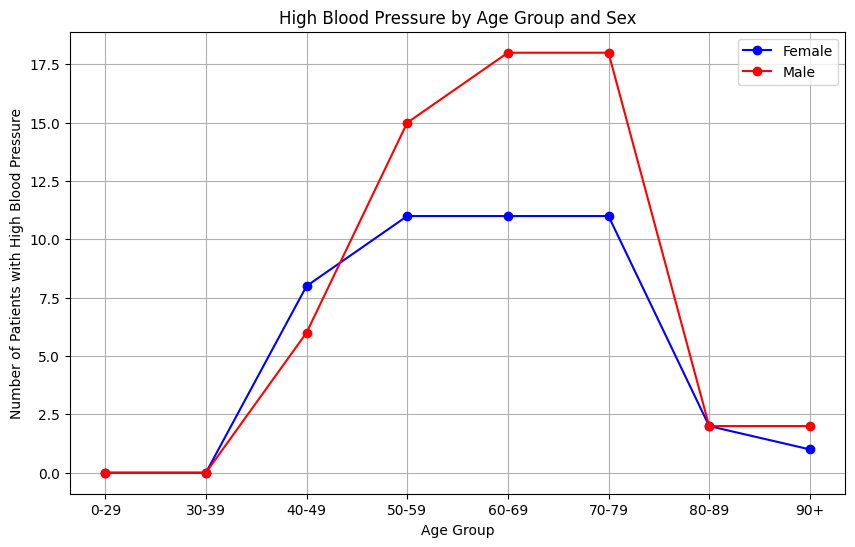

In [166]:
# Step 1: Create the plot
plt.figure(figsize=(10, 6))

# Plot the female counts
plt.plot(data_summary['age_group'], data_summary['Female'], marker='o', linestyle='-', color='blue', label='Female')

# Plot the male counts
plt.plot(data_summary['age_group'], data_summary['Male'], marker='o', linestyle='-', color='red', label='Male')

# Step 2: Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Patients with High Blood Pressure')
plt.title('High Blood Pressure by Age Group and Sex')

# Step 3: Add a legend
plt.legend()

# Step 4: Show the plot
plt.grid(True)
plt.show()



### Laura Sunley
#### Variables: Ejection Fraction and Serum Creatinine
#### Question: Are there clear signs from the combination of these factors that heart disease may occur?
##### Ejection fraction (EF) is a measurement used to assess how well your heart is pumping blood. It is expressed as a percentage and represents the proportion of blood that is ejected from the heart's left ventricle with each contraction. Normal Range: A normal ejection fraction typically ranges from 55% to 70%. This means that 55% to 70% of the blood in the left ventricle is pumped out with each heartbeat. Low Ejection Fraction:** An ejection fraction below 55% may indicate heart failure or cardiomyopathy. When the EF drops below 40%, it is often considered a marker of systolic heart failure. The majority of these patients have ejection fractions of less than the normal range.

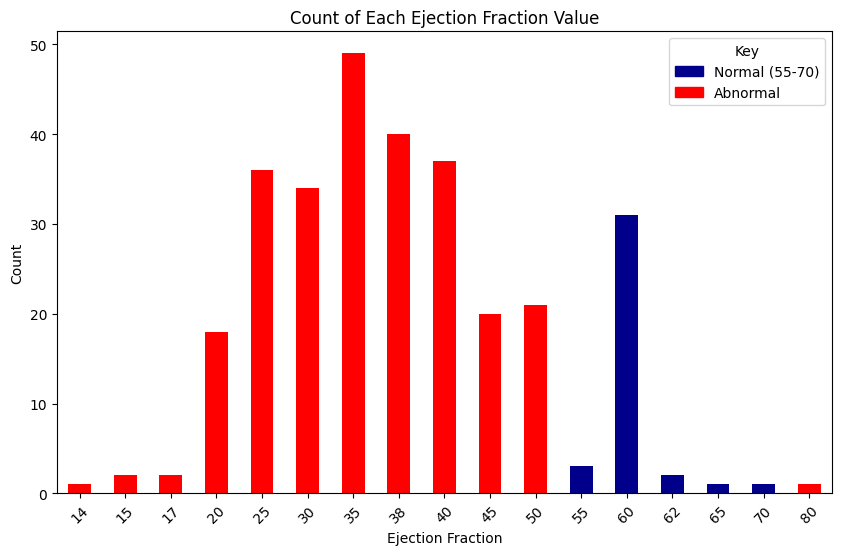

In [167]:

ejection_fraction_counts = heart_df['ejection_fraction'].value_counts()

# Sort the ejection fractions by value
ejection_fraction_counts = ejection_fraction_counts.sort_index()

# Define the color mapping
colors = ['darkblue' if 55 <= value <= 70 else 'red' for value in ejection_fraction_counts.index]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
ejection_fraction_counts.plot(kind='bar', color=colors)
normal_patch = mpatches.Patch(color='darkblue', label='Normal (55-70)')
abnormal_patch = mpatches.Patch(color='red', label='Abnormal')
plt.legend(handles=[normal_patch, abnormal_patch], title='Key')
plt.title('Count of Each Ejection Fraction Value')
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

# print("""Ejection fraction (EF) is a measurement used to assess how well your heart is pumping blood.\n 
# It is expressed as a percentage and represents the proportion of blood that is ejected from the heart's left ventricle with each contraction.\n
# Normal Range: A normal ejection fraction typically ranges from 55% to 70%. This means that 55% to 70% of the blood in the left ventricle is pumped out with each heartbeat.\n
# Low Ejection Fraction:** An ejection fraction below 55% may indicate heart failure or cardiomyopathy. When the EF drops below 40%, it is often considered a marker of systolic heart failure.\n
# The majority of these patients have ejection fractions of less than the normal range.""")


##### Serum creatinine is a blood test that measures the level of creatinine in your blood. Creatinine is a waste product produced by muscles from the breakdown of a compound called creatine. Normal Range: The normal range of serum creatinine varies slightly depending on age, sex, and muscle mass. Generally, for adult men, it is about 0.7 to 1.3 milligrams per deciliter (mg/dL), and for adult women, it is about 0.6 to 1.1 mg/dL.

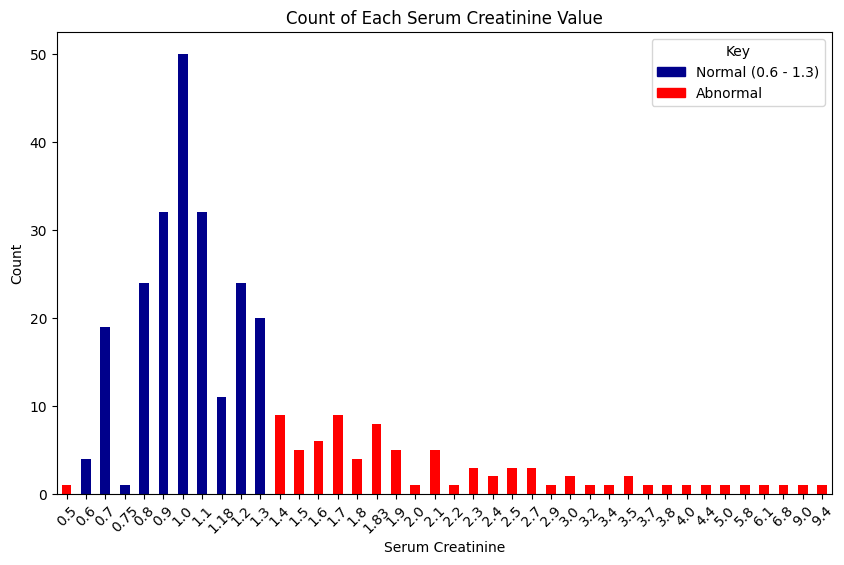

In [168]:
serum_counts = heart_df['serum_creatinine'].value_counts()

# Sort the ejection fractions by value
serum_counts = serum_counts.sort_index()

# Define the color mapping
colors = ['darkblue' if 0.6 <= value <= 1.3 else 'red' for value in serum_counts.index]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
serum_counts.plot(kind='bar', color = colors)
normal_patch = mpatches.Patch(color='darkblue', label='Normal (0.6 - 1.3)')
abnormal_patch = mpatches.Patch(color='red', label='Abnormal')
plt.legend(handles=[normal_patch, abnormal_patch], title='Key')
plt.title('Count of Each Serum Creatinine Value')
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# print("""Serum creatinine is a blood test that measures the level of creatinine in your blood. \n
# Creatinine is a waste product produced by muscles from the breakdown of a compound called creatine. \n 
# Normal Range: The normal range of serum creatinine varies slightly depending on age, sex, and muscle mass. \n
# Generally, for adult men, it is about 0.7 to 1.3 milligrams per deciliter (mg/dL), \n
# and for adult women, it is about 0.6 to 1.1 mg/dL.""")

##### Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). From just the data it doesn't appear to be easy to visually see a pattern since there are deaths and no deaths in the same clusters.

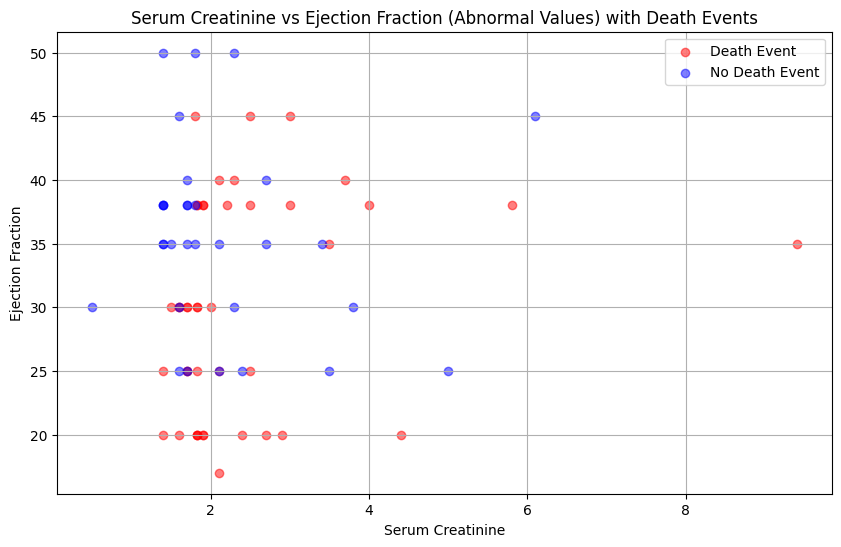

In [169]:
# Filter the DataFrame for abnormal Serum Creatinine and Ejection Fraction values
filtered_df_abnormal = heart_df[
    (~heart_df["serum_creatinine"].between(0.6, 1.3)) & 
    (~heart_df["ejection_fraction"].between(55, 70))
]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for abnormal values that resulted in death
plt.scatter(filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 1]["serum_creatinine"],
            filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 1]["ejection_fraction"],
            c='red', label='Death Event', alpha=0.5)

# Scatter plot for abnormal values that did not result in death
plt.scatter(filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 0]["serum_creatinine"],
            filtered_df_abnormal[filtered_df_abnormal["DEATH_EVENT"] == 0]["ejection_fraction"],
            c='blue', label='No Death Event', alpha=0.5)

plt.title('Serum Creatinine vs Ejection Fraction (Abnormal Values) with Death Events')
plt.xlabel('Serum Creatinine')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.grid(True)
plt.show()

# print("""Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure \n
#       from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)\n
# From just the data it doesn't appear to be easy to visually see a pattern since there are deaths and no deaths in the same clusters""")

### Logan - Anemia, platelet, death event based on age group

In [170]:
# Patients with amaenia that encountered a death event
anaemia_death = heart_df[(heart_df['anaemia'] == 1) & (heart_df['DEATH_EVENT'] == 1)]
num_anaemia_deaths = len(anaemia_death)
print(f"The number of anaemic patients that had a death event: {num_anaemia_deaths}")
# Patients without anaemia that encountered a death event 
non_anaemia_death = heart_df[(heart_df['anaemia'] == 0) & (heart_df['DEATH_EVENT'] == 1)]
num_non_anaemia_deaths = len(non_anaemia_death)
print(f"The number of non-anaemic patients that had a death event: {num_non_anaemia_deaths}")

The number of anaemic patients that had a death event: 46
The number of non-anaemic patients that had a death event: 50


##### The study included 299 patients, with 129 anaemic and 170 non-anaemic. Of the 96 deaths, 46 (35.7%) were anaemic, making up 47.9% of total deaths, while 50 (29.4%) were non-anaemic, accounting for 52.1% of total deaths. Despite a higher death rate among anaemic patients, the majority of deaths occurred in the non-anaemic group suggesting anaemia does not significantly contribute to heart disease.

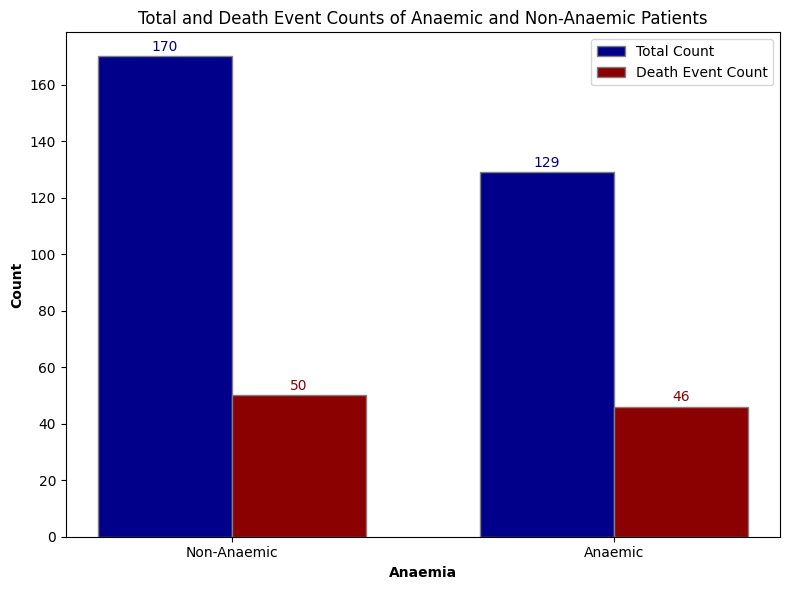

In [171]:
anaemia_counts = heart_df['anaemia'].value_counts().rename_axis('anaemia').reset_index(name='total_count')
death_event_counts = heart_df[heart_df['DEATH_EVENT'] == 1]['anaemia'].value_counts().rename_axis('anaemia').reset_index(name='death_event_count')
anaemia_counts['anaemia'] = anaemia_counts['anaemia'].replace({1: 'Anaemic', 0: 'Non-Anaemic'})
death_event_counts['anaemia'] = death_event_counts['anaemia'].replace({1: 'Anaemic', 0: 'Non-Anaemic'})

#Merge
merged_counts = anaemia_counts.merge(death_event_counts, on='anaemia')

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Width of the bars
bar_width = 0.35

# Positions of the bars on the x-axis
r = range(len(merged_counts))

# Bar plot for total counts
ax.bar(r, merged_counts['total_count'], color='darkblue', width=bar_width, edgecolor='grey', label='Total Count')
# Bar plot for death event counts, shifted by bar_width
ax.bar([x + bar_width for x in r], merged_counts['death_event_count'], color='darkred', width=bar_width, edgecolor='grey', label='Death Event Count')

# Add numbers above the bars
for i in range(len(merged_counts)):
    ax.text(r[i], merged_counts['total_count'][i] + 2, str(merged_counts['total_count'][i]), ha='center', color='darkblue')
    ax.text(r[i] + bar_width, merged_counts['death_event_count'][i] + 2, str(merged_counts['death_event_count'][i]), ha='center', color='darkred')
# Add labels and title
ax.set_xlabel('Anaemia', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')
ax.set_title('Total and Death Event Counts of Anaemic and Non-Anaemic Patients')
ax.set_xticks([r + bar_width/2 for r in range(len(merged_counts))])
ax.set_xticklabels(merged_counts['anaemia'])

# Add legend
ax.legend()

plt.tight_layout()

plt.show()

#### How does the combination of platelet count and anemia status affect the death rate across different age groups?
##### This chart shows that the death rate generally increases with age across all groups, but the combination of platelet count and anemia status does have an impact. In older age groups (80+), those with low platelets and no anemia, or high platelets with anemia, face the highest mortality risk. Those with high platelets without anemia appear to reduce mortality in the oldest age group (90+), suggesting that platelet count and anemia status can be factors in predicting death rates as age increases.

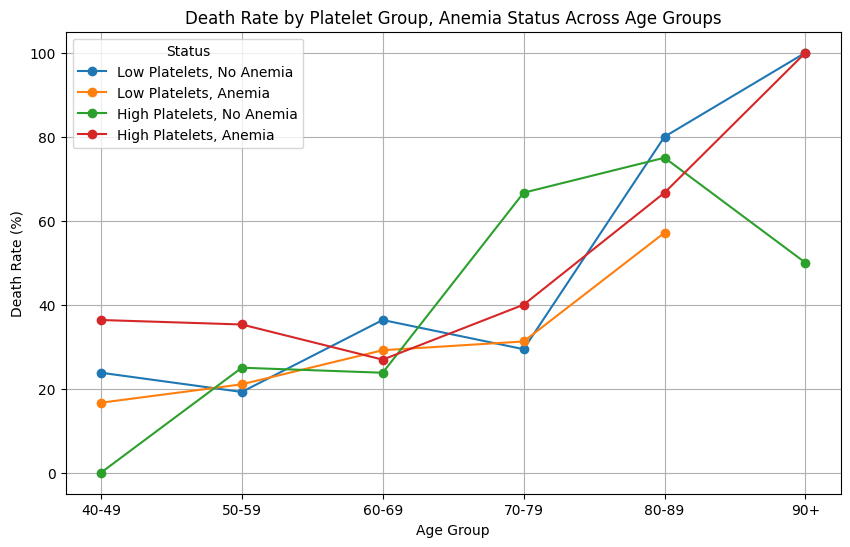

In [172]:
heart_df = pd.DataFrame(heart_df)

age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)

heart_df['platelet_group'] = np.where(heart_df['platelets'] >= heart_df['platelets'].median(), 'High Platelets', 'Low Platelets')

grouped_df = heart_df.groupby(['age_group', 'platelet_group', 'anaemia'], observed=False)['DEATH_EVENT'].mean().unstack(fill_value=0) * 100

grouped_df.unstack(level='platelet_group').plot(kind='line', figsize=(10, 6), marker='o')

plt.title('Death Rate by Platelet Group, Anemia Status Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.grid(True)

plt.legend(title="Status", labels=["Low Platelets, No Anemia", "Low Platelets, Anemia", "High Platelets, No Anemia", "High Platelets, Anemia"])

plt.show()

##### The heatmap shows a higher concentration of death events in the 60-79 age range, particularly for those with high platelets and anaemia (dark red), indicating this is a critical group. Younger age groups (below 50) show fewer death events, reflecting lower overall mortality

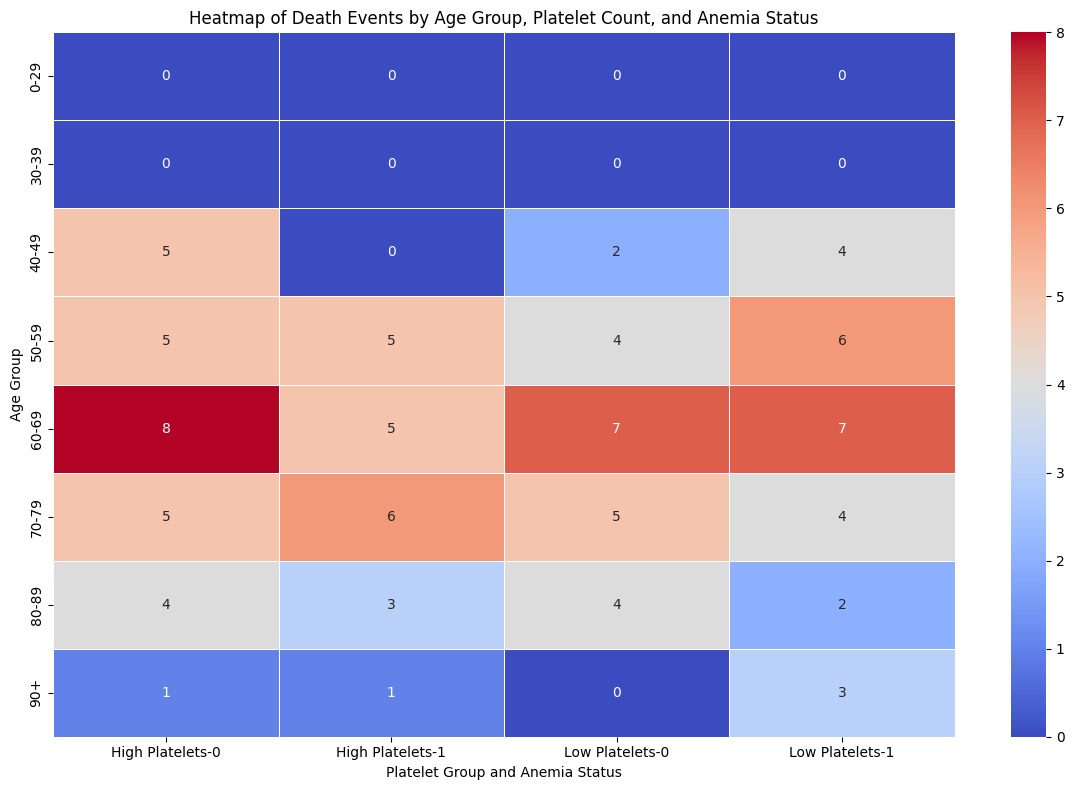

In [173]:
heart_df = pd.DataFrame(heart_df)

age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)

heart_df['platelet_group'] = np.where(heart_df['platelets'] >= heart_df['platelets'].median(), 'High Platelets', 'Low Platelets')

grouped_df = heart_df.groupby(['age_group', 'platelet_group', 'anaemia'], observed=False)['DEATH_EVENT'].sum().reset_index()

heatmap_data = grouped_df.pivot_table(index='age_group', columns=['platelet_group', 'anaemia'], values='DEATH_EVENT', fill_value=0, observed=False)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap of Death Events by Age Group, Platelet Count, and Anemia Status')
plt.xlabel('Platelet Group and Anemia Status')
plt.ylabel('Age Group')

plt.tight_layout()
plt.show()

### Susan - Smoke, diabetes comparing the number of deaths over time/ Smoke, diabetes comparing to age group

In [174]:
# Smoking patients that encountered a death event
smoke_death = heart_df[(heart_df["smoking"] == 1) & (heart_df["DEATH_EVENT"]==1)]
num_smoke_deaths = len(smoke_death)
print(f"The number of smoking that had a death event: {num_smoke_deaths}")

The number of smoking that had a death event: 30


In [175]:
# Non-Smoking patients that encountered a death event
non_smoke_death = heart_df[(heart_df["smoking"] == 0) & (heart_df["DEATH_EVENT"]==1)]
num_non_smoke_death = len(non_smoke_death)
print(f"The number of non smoking that had a death event: {num_non_smoke_death}")

The number of non smoking that had a death event: 66


### Question: How does smoke comparing the number of deaths over time?
##### Smokers show larger and earlier spikes in death rates, while non-smokers experience fewer and more stable deaths over time. This suggests that smoking significantly increases the risk of early death, possibly because smokers enter the study with more advanced health issues.

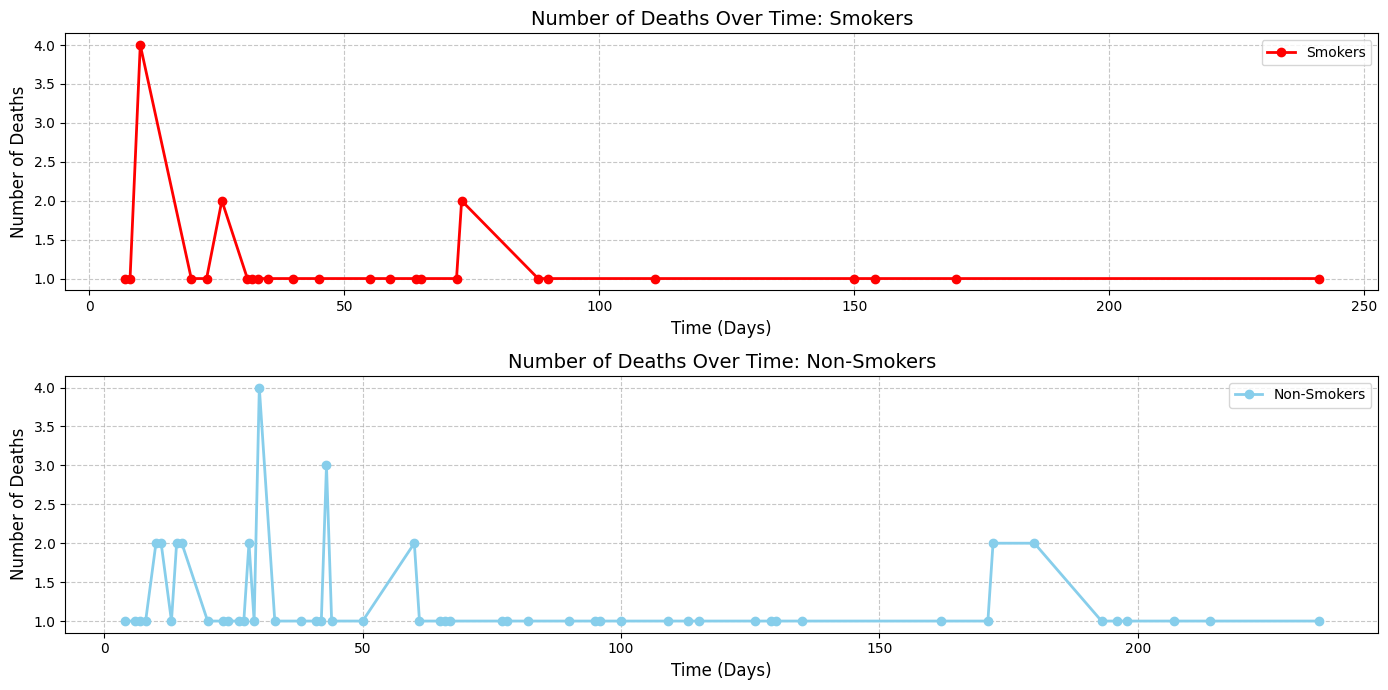

In [176]:
# Group by time group and calculate the number of deaths
smokers = heart_df[heart_df['smoking'] == 1]
non_smokers = heart_df[heart_df['smoking'] == 0]

# Group by time (assuming you have a 'date' column)
smoker_deaths_over_time = smokers[smokers['DEATH_EVENT'] == 1].groupby('time').size()
non_smoker_deaths_over_time = non_smokers[non_smokers['DEATH_EVENT'] == 1].groupby('time').size()

# Create the figure and axis for smokers
plt.figure(figsize=(14, 7))

# Plot for smokers
plt.subplot(2, 1, 1)
plt.plot(smoker_deaths_over_time.index, smoker_deaths_over_time.values, 
         label='Smokers', color='red', linestyle='-', marker='o', linewidth=2, markersize=6)
# plt.plot(smoker_deaths_over_time_smooth.index, smoker_deaths_over_time_smooth.values, 
#          label='Smokers (Smooth)', color='darkred', linewidth=3, markersize=8)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Number of Deaths Over Time: Smokers', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for non-smokers
plt.subplot(2, 1, 2)
plt.plot(non_smoker_deaths_over_time.index, non_smoker_deaths_over_time.values, 
         label='Non-Smokers', color='skyblue', linestyle='-', marker='o', linewidth=2, markersize=6)
# plt.plot(non_smoker_deaths_over_time_smooth.index, non_smoker_deaths_over_time_smooth.values, 
#          label='Non-Smokers (Smooth)', color='blue', linewidth=3, markersize=8)
plt.xlabel('Time (Days)', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.title('Number of Deaths Over Time: Non-Smokers', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Question: How does smoke comparing the number of deaths over time changed if adding diabetes factor?
##### The analysis shows that smoking and diabetes each independently increase the risk of death, with the combination of both leading to the highest mortality rate. Smokers, whether diabetic or not, face a higher death risk compared to non-smokers. Among non-smokers, those with diabetes still experience more deaths than those without, emphasizing the impact of diabetes on mortality. Overall, non-smokers without diabetes have the lowest death rate, highlighting the significant benefits of avoiding both smoking and diabetes.

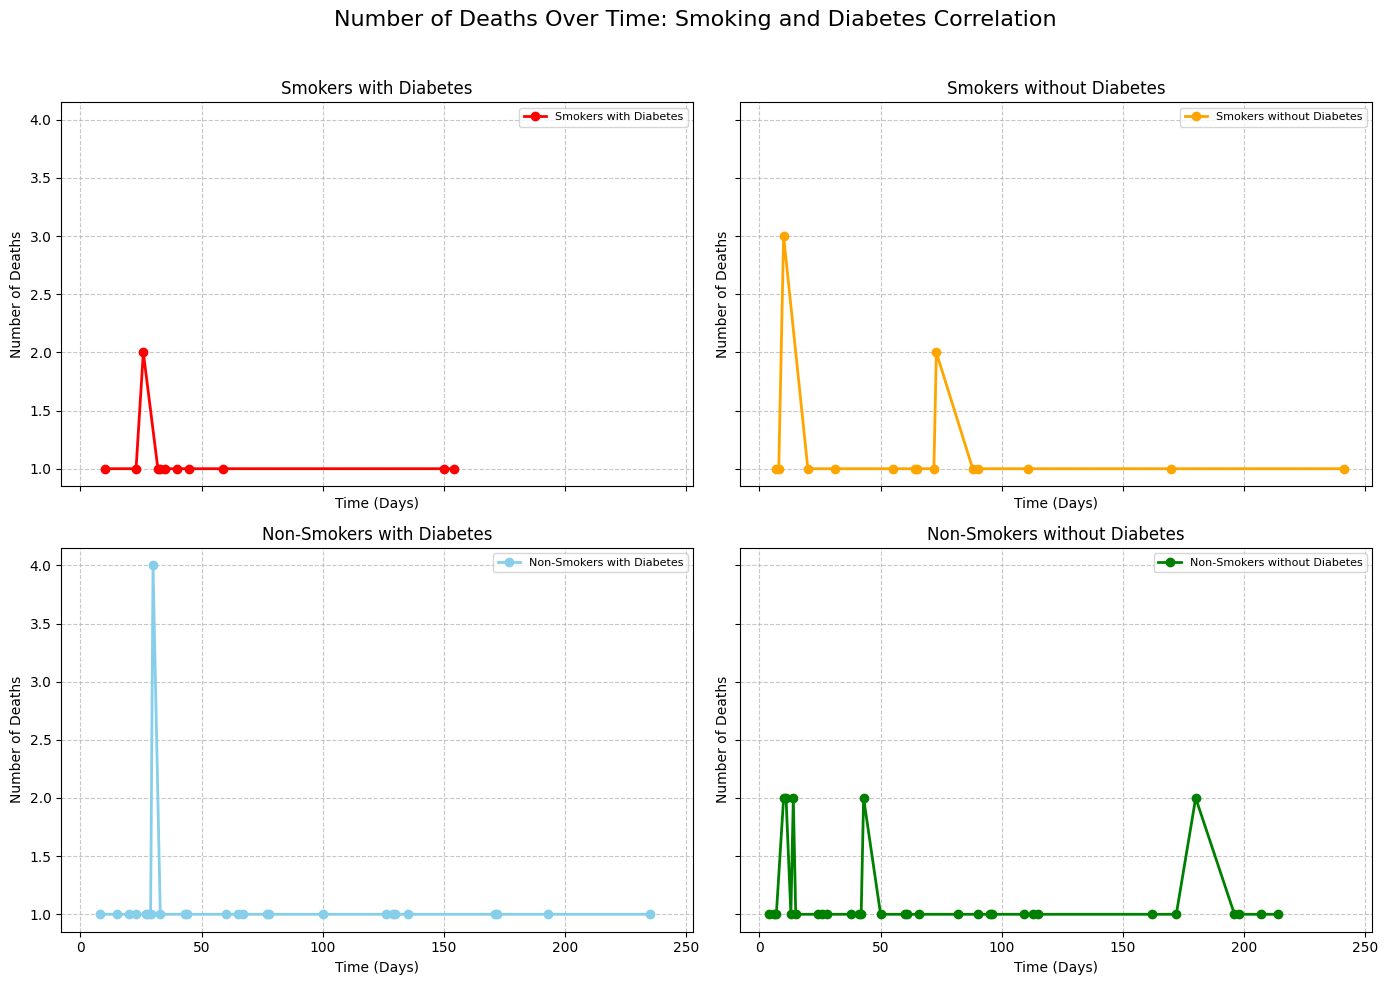

In [177]:
# Filter data based on smoking and diabetes status
smokers_diabetes = heart_df[(heart_df['smoking'] == 1) & (heart_df['diabetes'] == 1)]
smokers_no_diabetes = heart_df[(heart_df['smoking'] == 1) & (heart_df['diabetes'] == 0)]
non_smokers_diabetes = heart_df[(heart_df['smoking'] == 0) & (heart_df['diabetes'] == 1)]
non_smokers_no_diabetes = heart_df[(heart_df['smoking'] == 0) & (heart_df['diabetes'] == 0)]

# Group by time and count the number of deaths
smoker_diabetes_deaths_over_time = smokers_diabetes[smokers_diabetes['DEATH_EVENT'] == 1].groupby('time').size()
smoker_no_diabetes_deaths_over_time = smokers_no_diabetes[smokers_no_diabetes['DEATH_EVENT'] == 1].groupby('time').size()
non_smoker_diabetes_deaths_over_time = non_smokers_diabetes[non_smokers_diabetes['DEATH_EVENT'] == 1].groupby('time').size()
non_smoker_no_diabetes_deaths_over_time = non_smokers_no_diabetes[non_smokers_no_diabetes['DEATH_EVENT'] == 1].groupby('time').size()



fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

# Plot for Smokers with Diabetes
axes[0, 0].plot(smoker_diabetes_deaths_over_time.index, smoker_diabetes_deaths_over_time.values, 
                label='Smokers with Diabetes', color='red', linestyle='-', marker='o', linewidth=2, markersize=6)

axes[0, 0].set_title('Smokers with Diabetes')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot for Smokers without Diabetes
axes[0, 1].plot(smoker_no_diabetes_deaths_over_time.index, smoker_no_diabetes_deaths_over_time.values, 
                label='Smokers without Diabetes', color='orange', linestyle='-', marker='o', linewidth=2, markersize=6)

axes[0, 1].set_title('Smokers without Diabetes')
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Plot for Non-Smokers with Diabetes
axes[1, 0].plot(non_smoker_diabetes_deaths_over_time.index, non_smoker_diabetes_deaths_over_time.values, 
                label='Non-Smokers with Diabetes', color='skyblue', linestyle='-', marker='o', linewidth=2, markersize=6)

axes[1, 0].set_title('Non-Smokers with Diabetes')
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Plot for Non-Smokers without Diabetes
axes[1, 1].plot(non_smoker_no_diabetes_deaths_over_time.index, non_smoker_no_diabetes_deaths_over_time.values, 
                label='Non-Smokers without Diabetes', color='green', linestyle='-', marker='o', linewidth=2, markersize=6)

axes[1, 1].set_title('Non-Smokers without Diabetes')
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

# Set labels and title
for ax in axes.flat:
    ax.set_xlabel('Time (Days)', fontsize=10)
    ax.set_ylabel('Number of Deaths', fontsize=10)
    ax.legend(loc='upper right', fontsize=8)

fig.suptitle('Number of Deaths Over Time: Smoking and Diabetes Correlation', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [178]:
# Age group
age_bins = [0, 30, 40, 50 , 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)
heart_df.head()

# Smoking patients that encountered a death event by age group
smoke_death_age_group = heart_df[(heart_df["smoking"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='smoke_death_count')
smoke_death_age_group
# Non Smoking patients that encountered a death event by age group
non_smoke_death_age_group = heart_df[(heart_df["smoking"] == 0) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='smoke_death_count')
non_smoke_death_age_group

#merge smoke and non-smoke age group
death_age_group = smoke_death_age_group.merge(non_smoke_death_age_group, on="age_group", how='outer')
death_age_group

,age_group,smoke_death_count_x,smoke_death_count_y
0,0-29,0,0
1,30-39,0,0
2,40-49,1,10
3,50-59,5,15
4,60-69,10,17
5,70-79,8,12
6,80-89,5,8
7,90+,1,4


##### This bar chart illustrates the relationship between smoking, diabetes status, and the number of death events across various age groups. The highest death rate is observed in the 60-69 age group, particularly among smokers who are non-diabetic. Smokers generally experience more death events than non-smokers, regardless of diabetes status. Death events increase with age, peaking in the 60-69 group, then decline in older age groups (70-79 and beyond). Additionally, diabetic individuals tend to have more death events than non-diabetics within the same smoking status.

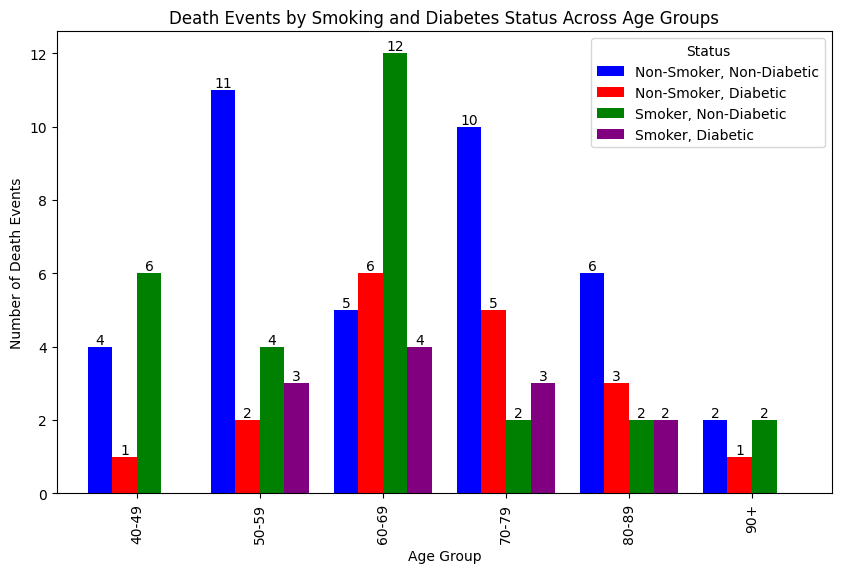

In [179]:
heart_df = pd.DataFrame(heart_df)

# Grouping data by age group, smoking, and diabetes
grouped_df = heart_df.groupby(['age_group', 'smoking', 'diabetes'], observed=False)['DEATH_EVENT'].sum().unstack(fill_value=0)

# Filter out zero values
grouped_df = grouped_df[grouped_df > 0].dropna(how='all')

# Plotting the grouped data with thicker bars
ax = grouped_df.unstack(level='smoking').plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green', 'purple'], width=0.8)

# Adding numbers on each bar
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Setting titles and labels
plt.title('Death Events by Smoking and Diabetes Status Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Death Events')
plt.legend(title="Status", labels=["Non-Smoker, Non-Diabetic", "Non-Smoker, Diabetic", "Smoker, Non-Diabetic", "Smoker, Diabetic"])

# Display the plot
plt.show()

##### This heatmap shows the relationship between smoking, diabetes status, and death events across age groups. The highest number of deaths occurs in the 60-69 age group, particularly among non-smokers with diabetes. Death events increase with age, peak in the 60-69 group, and then decline in older groups. Diabetics generally experience more deaths than non-diabetics within the same smoking status, emphasizing the impact of diabetes on mortality.

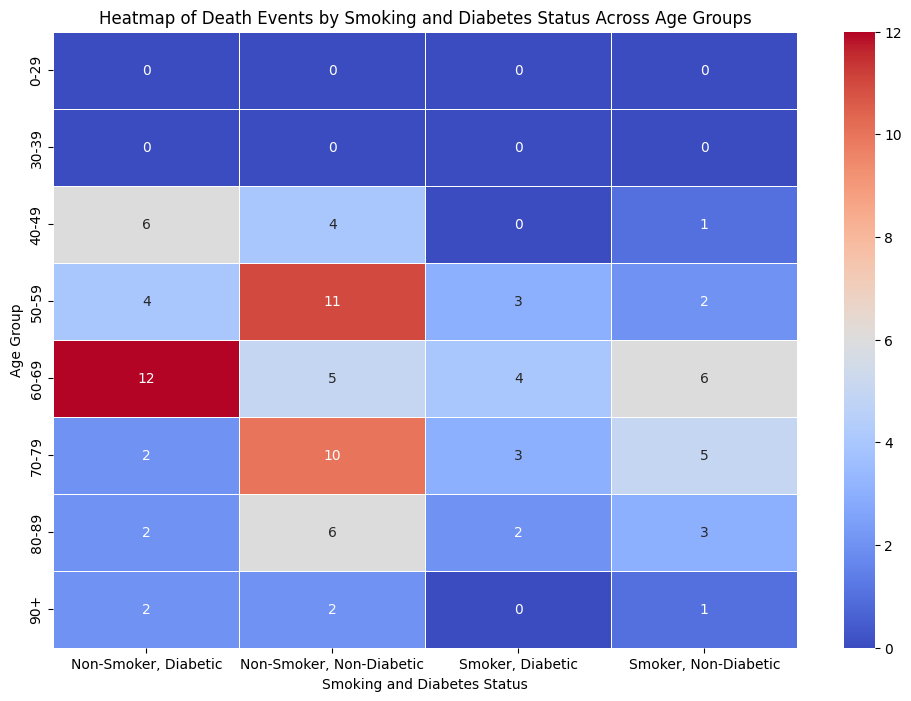

In [180]:
# Creating a 'status' column that combines smoking and diabetes status for easier plotting
heart_df['status'] = heart_df.apply(lambda x: f"{'Smoker' if x['smoking'] else 'Non-Smoker'}, {'Diabetic' if x['diabetes'] else 'Non-Diabetic'}", axis=1)

# Grouping data by age group and status
grouped_df = heart_df.groupby(['age_group', 'status'],observed=False)['DEATH_EVENT'].sum().unstack(fill_value=0)

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_df, annot=True, cmap='coolwarm', linewidths=0.5)

# Setting titles and labels
plt.title('Heatmap of Death Events by Smoking and Diabetes Status Across Age Groups')
plt.xlabel('Smoking and Diabetes Status')
plt.ylabel('Age Group')
plt.show()

##### Xian---Diabetes is a common disease, but without timely intervention, it can significantly impact heart health, increasing the risk of heart failure.

In [181]:
# Age group
age_bins = [0, 30, 40, 50 , 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)
heart_df.head()

# diabetes patients that encountered a death event by age group
diabetes_death_age_group = heart_df[(heart_df["diabetes"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='diabetes_death_count')
diabetes_death_age_group
# Non diabetes patients that encountered a death event by age group
non_diabetes_death_age_group = heart_df[(heart_df["diabetes"] == 0) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='non_diabetes_death_count')
non_diabetes_death_age_group

#merge diabetes and non-diabetes age group
death_age_group = diabetes_death_age_group.merge(non_diabetes_death_age_group, on="age_group", how='outer')
death_age_group

,age_group,diabetes_death_count,non_diabetes_death_count
0,0-29,0,0
1,30-39,0,0
2,40-49,6,5
3,50-59,7,13
4,60-69,16,11
5,70-79,5,15
6,80-89,4,9
7,90+,2,3


#### Question: "Did diabetes affect the death rate by age groups?"


#### In these age groups and data sets, the impact of having diabetes on 
#### mortality may not show a very significant difference, but this does not 
#### mean that diabetes has no effect on the mortality rate of heart failure patients.

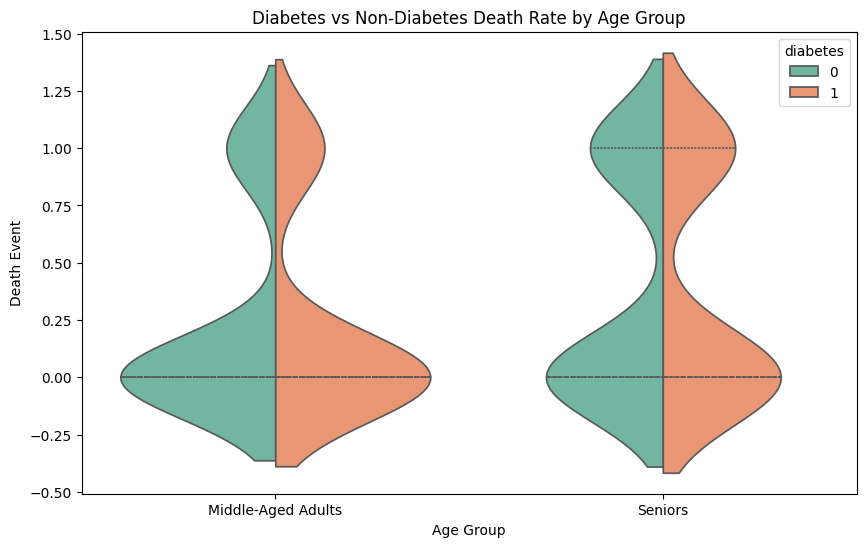

Question: "Did diabetes affect the death rate by age groups?"


In these age groups and data sets, the impact of having diabetes on 
mortality may not show a very significant difference, but this does not 
mean that diabetes has no effect on the mortality rate of heart failure patients.




In [182]:
# Define age groups and labels
age_bins = [36, 60, 100]
age_labels = ['Middle-Aged Adults', 'Seniors']

# Divide age groups according to age ranges
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)

# Create a violin plot for the data
plt.figure(figsize=(10, 6))

# Plot the violin plot
sns.violinplot(x='age_group', y='DEATH_EVENT', hue='diabetes', data=heart_df, split=True, inner="quart", palette="Set2")

# Set the title and labels
plt.title('Diabetes vs Non-Diabetes Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Event')

# Display the plot
plt.show()


text1 = "Question: \"Did diabetes affect the death rate by age groups?\"\n\n"
text2 = (
    "In these age groups and data sets, the impact of having diabetes on \n"
    "mortality may not show a very significant difference, but this does not \n"
    "mean that diabetes has no effect on the mortality rate of heart failure patients.\n\n"
)

print(text1)

print(text2)


#### Of course, proper and scientifically-based management of diabetes is key to maintaining a low mortality rate.
#### The pie chart below visually compares the mortality rates of heart disease caused by diabetes with those caused by other factors.
#### It shows that with effective diabetes management, the mortality rate from diabetes-related heart failure can be kept at a relatively low level.

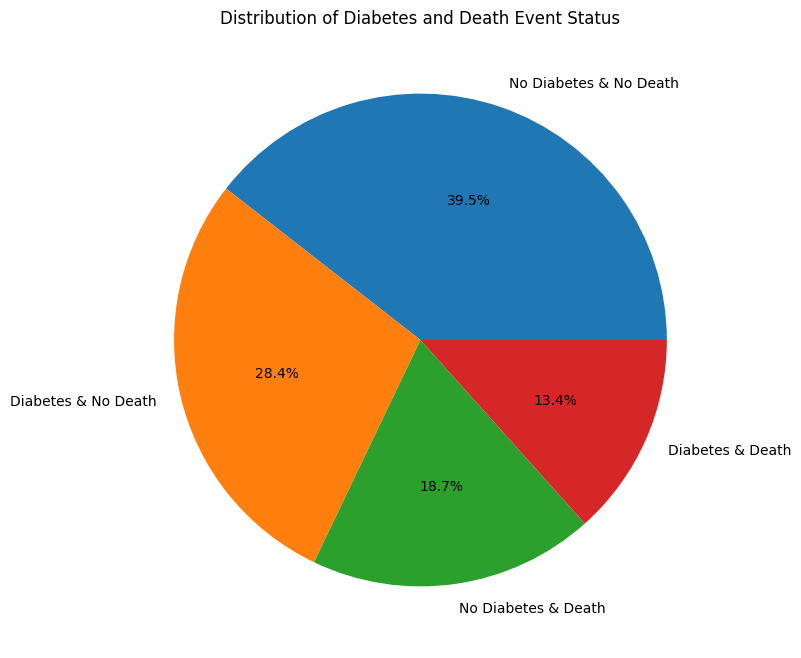

Of course, proper and scientifically-based management of diabetes is key to maintaining a low mortality rate.
The pie chart above visually compares the mortality rates of heart disease caused by diabetes with those caused by other factors.
It shows that with effective diabetes management, the mortality rate from diabetes-related heart failure can be kept at a relatively low level.



In [183]:
# The proportion of combinations of whether or not someone has diabetes and whether or not they died.
# Create a new column based on the combination of diabetes status and death events
heart_df['category'] = heart_df.apply(lambda row: 
                                      'Diabetes & Death' if row['diabetes'] == 1 and row['DEATH_EVENT'] == 1 else
                                      ('Diabetes & No Death' if row['diabetes'] == 1 and row['DEATH_EVENT'] == 0 else
                                       ('No Diabetes & Death' if row['diabetes'] == 0 and row['DEATH_EVENT'] == 1 else
                                        'No Diabetes & No Death')), axis=1)

# Calculate the distribution of each category
category_distribution = heart_df['category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%')

plt.title('Distribution of Diabetes and Death Event Status')
plt.show()

text = (
    "Of course, proper and scientifically-based management of diabetes is key to maintaining a low mortality rate.\n"
    "The pie chart above visually compares the mortality rates of heart disease caused by diabetes with those caused by other factors.\n"
    "It shows that with effective diabetes management, the mortality rate from diabetes-related heart failure can be kept at a relatively low level.\n"
)

print(text)

##### Diabetes can lead to heart failure, which in turn can cause systemic organ failure. Heart failure is a slowly progressing disease that tends to worsen with age. Ejection fraction is one of the key indicators used to assess heart failure; the lower the ejection fraction, the greater the likelihood of systemic organ failure and, consequently, a higher mortality rate. This chart indicates that there are significant differences in ejection fraction among diabetic patients across different age groups, particularly in the 40-79 age range, where heart function tends to be more unstable.


<Figure size 1000x600 with 0 Axes>

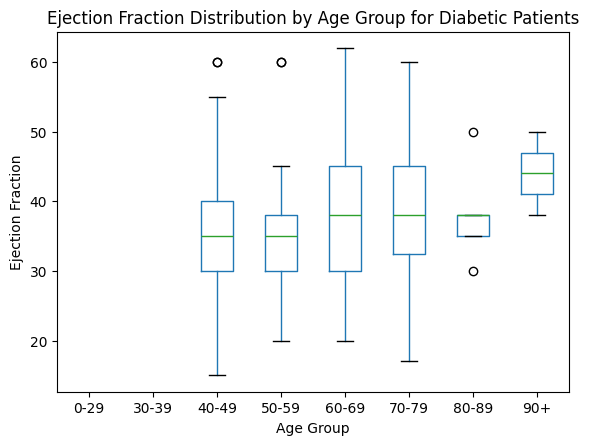

This chart indicates that there are significant differences in ejection fraction 
among diabetic patients across different age groups, particularly in the 40-79 
age range, where heart function tends to be more unstable.



In [184]:
import pandas as pd
import matplotlib.pyplot as plt

age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)

diabetes_data = heart_df[heart_df['diabetes'] == 1]

plt.figure(figsize=(10, 6))

diabetes_data.boxplot(column='ejection_fraction', by='age_group', grid=False)

plt.title('Ejection Fraction Distribution by Age Group for Diabetic Patients')
plt.suptitle('')  
plt.xlabel('Age Group')
plt.ylabel('Ejection Fraction')

plt.show()

text = (
    "This chart indicates that there are significant differences in ejection fraction \n"
    "among diabetic patients across different age groups, particularly in the 40-79 \n"
    "age range, where heart function tends to be more unstable.\n"
)

print(text)

#### How the physical data to affect cardiac disease?
#### Summarize and visualize the distribution of health metrics and outcomes within the patient population.

#### This chart indicates that there are significant differences in ejection fraction 
#### among diabetic patients across different age groups, particularly in the 40-79 
#### age range, where heart function tends to be more unstable.


/var/folders/hd/p5_45krj19z5mg2jsb55zjcr0000gn/T/ipykernel_6494/541569778.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = heart_df.groupby('age_group')[['high_blood_pressure', 'diabetes', 'DEATH_EVENT']].mean()


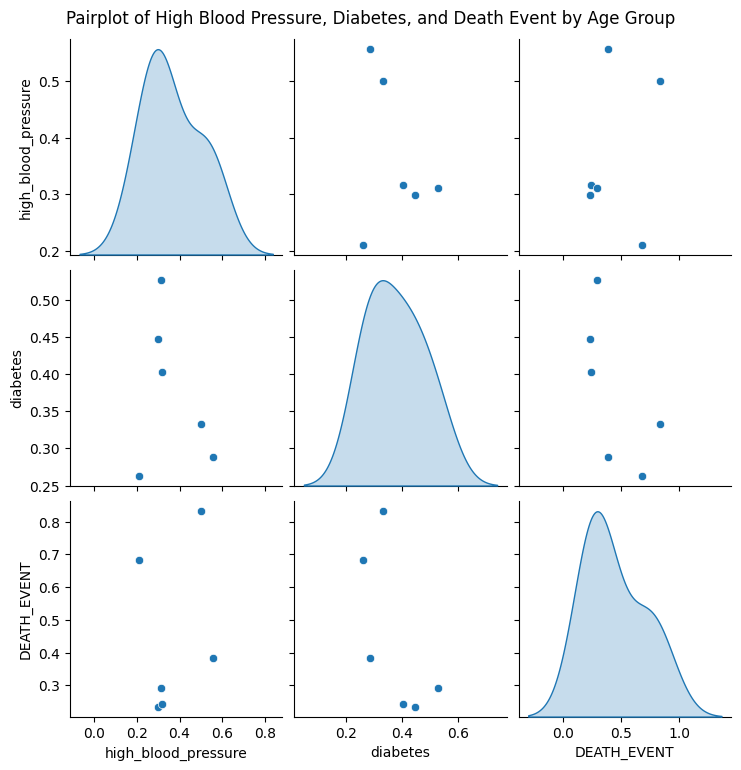

How the physical data to affect cardiac disease?
Summarize and visualize the distribution of health metrics and outcomes within the patient population.

This chart indicates that there are significant differences in ejection fraction 
among diabetic patients across different age groups, particularly in the 40-79 
age range, where heart function tends to be more unstable.



In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)

grouped_df = heart_df.groupby('age_group')[['high_blood_pressure', 'diabetes', 'DEATH_EVENT']].mean()

sns.pairplot(grouped_df, diag_kind='kde')

plt.suptitle("Pairplot of High Blood Pressure, Diabetes, and Death Event by Age Group", y=1.02)
plt.show()

text1 = (
    "How the physical data to affect cardiac disease?\n"
    "Summarize and visualize the distribution of health metrics and outcomes within the patient population.\n"
)

print(text1)

text2 = (
    "This chart indicates that there are significant differences in ejection fraction \n"
    "among diabetic patients across different age groups, particularly in the 40-79 \n"
    "age range, where heart function tends to be more unstable.\n"
)

print(text2)